Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/ANN/Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Univariate Analysis for Numerical Data

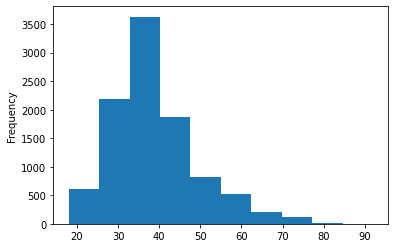

In [5]:
data['Age'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9b3e47f110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9b3e47fb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9b3e45b8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9b3e488690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9b3e488bd0>],
 'means': []}

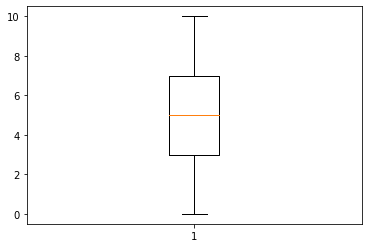

In [6]:
#Box plot
plt.boxplot(data['Tenure'])

<BarContainer object of 10000 artists>

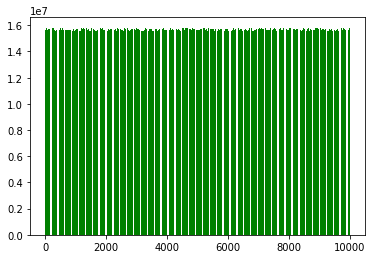

In [7]:
#Univariate Analysis for Categorical Data
#Bar Chart
df = pd.DataFrame(data)
  
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
plt.bar(X, Y, color='g')

<BarContainer object of 10000 artists>

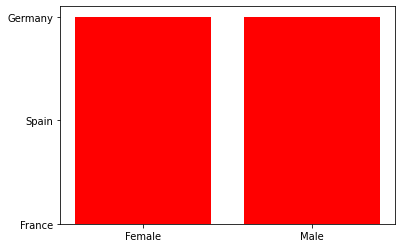

In [8]:
#Bivariate Analysis for Categorical Data
#Stacked Bar chart
plt.bar(data['Gender'], data['Geography'], color='r')

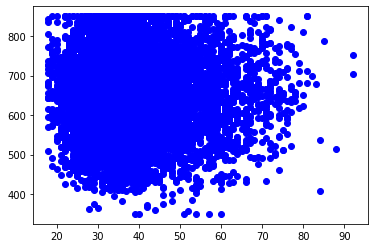

In [9]:
#Bivariate Analysis for Numerical Data
plt.scatter(data['Age'],data['CreditScore'], color='b')

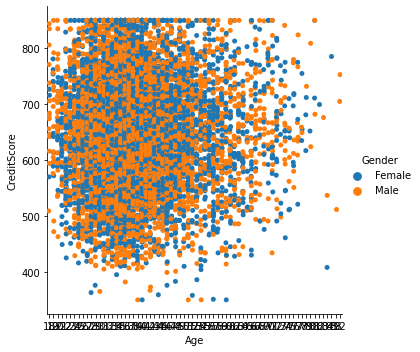

In [10]:
#Multivariate Analysis for 2 Numerical and 1 Categorical Data
#Scatter Plot
import seaborn as sns
sns.catplot(data=data, x="Age", y="CreditScore", hue="Gender")

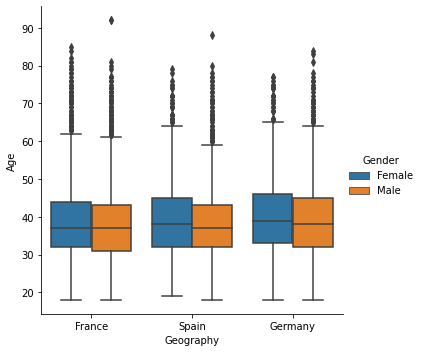

In [11]:
#Multivariate Analysis for 2 Categorical and 1 Numerical Data
#Box Plot
sns.catplot(data=data, x="Geography", y="Age", hue="Gender", kind="box")

Perform Descriptive Statistics on Dataset

In [12]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [13]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [14]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
data.shape

(10000, 14)

In [16]:
# Handling the missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


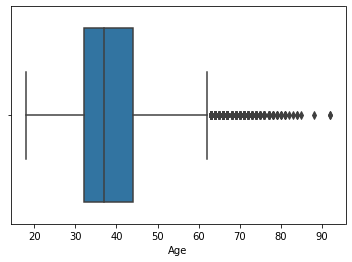

In [17]:
# Fint the outliers and Replace the outliers
sns.boxplot(data['Age'])

In [18]:
qnt=data.quantile(q=[0.25,0.75])
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [19]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [20]:
upper_extreme = qnt.loc[0.75]+1.5*IQR
upper_extreme

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [21]:
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [22]:
df2 = data[(data['Age']<upper_extreme['Age']) & (data['Age']>lower_extreme['Age'])]

In [23]:
data.shape

(10000, 14)

In [24]:
df2.shape

(9589, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


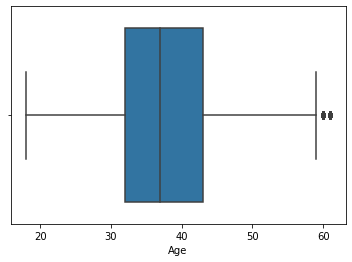

In [25]:
sns.boxplot(df2['Age'])

Check for Categorical columns and perform encoding


In [26]:
#Categorical are Geography and Gender
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()
df2['Geography'] = le.fit_transform(df2['Geography'])
df2['Gender'] = le.fit_transform(df2['Gender'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
#Split the data into dependent and independent variables.
y=df2['EstimatedSalary']
x=df2.drop(columns=['EstimatedSalary'],axis=1)

In [30]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,0


In [31]:
z=x.drop(columns=['Surname','RowNumber','CustomerId','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited'],axis=1)
z.head()

,CreditScore,Geography,Gender,Age
0,619,0,0,42
1,608,2,0,41
2,502,0,0,42
3,699,0,0,39
4,850,2,0,43


In [32]:
#Scale the independent variables
names=z.columns
names

Index(['CreditScore', 'Geography', 'Gender', 'Age'], dtype='object')

In [33]:
from sklearn.preprocessing import scale


In [34]:
z=scale(z)
z

array([[-0.32370448, -0.90175758, -1.09674455,  0.50205394],
       [-0.43751069,  1.51663241, -1.09674455,  0.38636147],
       [-1.53418871, -0.90175758, -1.09674455,  0.50205394],
       ...,
       [ 0.60743723, -0.90175758, -1.09674455, -0.19210091],
       [ 1.25923643,  0.30743742,  0.91178935,  0.50205394],
       [ 1.46615681, -0.90175758, -1.09674455, -1.1176407 ]])

In [35]:
z = pd.DataFrame(z, columns =[names])

In [36]:
z.head()

,CreditScore,Geography,Gender,Age
0,-0.323704,-0.901758,-1.096745,0.502054
1,-0.437511,1.516632,-1.096745,0.386361
2,-1.534189,-0.901758,-1.096745,0.502054
3,0.503977,-0.901758,-1.096745,0.154977
4,2.066226,1.516632,-1.096745,0.617746


#Split The data into Training and Testing


In [37]:

from sklearn.model_selection import train_test_split


In [38]:
x_train,x_test,y_train,y_test = train_test_split(z,y,test_size=0.2)

In [39]:
x_train

,CreditScore,Geography,Gender,Age
54,-0.509933,0.307437,0.911789,0.502054
6118,1.517887,-0.901758,0.911789,-1.580411
5458,-0.861697,-0.901758,0.911789,0.154977
3659,-0.261628,-0.901758,-1.096745,0.270669
4769,-1.141040,0.307437,0.911789,-0.307793
...,...,...,...,...
2395,2.066226,-0.901758,0.911789,0.154977
7687,-0.841005,1.516632,0.911789,0.386361
2075,0.969548,-0.901758,-1.096745,0.733439
2578,-0.509933,-0.901758,0.911789,1.427594


In [40]:
y_test

1922    133807.77
7363     38829.11
1990    193093.77
5486     92914.67
9974     13549.24
          ...    
9728    115262.54
5282    108798.36
4032     12050.77
9836    170409.45
2744    113481.02
Name: EstimatedSalary, Length: 1918, dtype: float64

In [41]:
x_test

,CreditScore,Geography,Gender,Age
1851,-0.261628,-0.901758,0.911789,-0.192101
7063,-0.489241,-0.901758,0.911789,0.270669
1917,1.973112,1.516632,0.911789,0.386361
5257,1.248890,1.516632,-1.096745,0.386361
9563,-0.696161,-0.901758,0.911789,-0.539178
...,...,...,...,...
9327,-0.354743,0.307437,-1.096745,0.617746
5059,1.776537,-0.901758,0.911789,-0.654871
3866,-2.279102,-0.901758,0.911789,0.039284
9428,-0.654777,-0.901758,0.911789,0.154977


In [42]:
y_test

1922    133807.77
7363     38829.11
1990    193093.77
5486     92914.67
9974     13549.24
          ...    
9728    115262.54
5282    108798.36
4032     12050.77
9836    170409.45
2744    113481.02
Name: EstimatedSalary, Length: 1918, dtype: float64